In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
prophet_results = pd.read_csv('/Users/jinny/Documents/touristcast/SARIMAX/Prophet_error_crossval.csv', index_col=0)
prophet_results.drop_duplicates(inplace=True)

In [3]:
prophet_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 69
Data columns (total 6 columns):
region       65 non-null object
periods      65 non-null int64
MAE          65 non-null float64
RMSE         65 non-null float64
Max_error    65 non-null float64
MASE         65 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


### Lowest MASE by region

In [4]:
for reg, group in prophet_results.groupby('region'):
    print(group.loc[group.MASE.idxmin()])

region             ARA
periods              6
MAE            63.4755
RMSE           85.7206
Max_error    0.0760376
MASE          0.712447
Name: 24, dtype: object
region            BFC
periods             5
MAE           21.6764
RMSE          26.7305
Max_error     0.06418
MASE         0.755627
Name: 53, dtype: object
region             BRE
periods              4
MAE             19.856
RMSE           24.3146
Max_error    0.0379431
MASE          0.852709
Name: 37, dtype: object
region            COR
periods             5
MAE           196.797
RMSE          209.057
Max_error    0.452132
MASE          11.8238
Name: 48, dtype: object
region            CVL
periods             3
MAE           16.8682
RMSE          19.4033
Max_error    0.052734
MASE         0.705046
Name: 1, dtype: object
region             GES
periods              3
MAE            25.5439
RMSE           31.6597
Max_error    0.0516709
MASE          0.728005
Name: 56, dtype: object
region             HDF
periods              5
M

In [5]:
prophet_results.loc[prophet_results.MASE.idxmin()]

region             PDL
periods              6
MAE            16.6812
RMSE           22.4288
Max_error    0.0596792
MASE           0.47201
Name: 34, dtype: object

In [6]:
prophet_results.loc[prophet_results.MASE.idxmax()]

region            COR
periods             3
MAE           202.859
RMSE          214.963
Max_error    0.472562
MASE           22.689
Name: 46, dtype: object

### RMSE curves

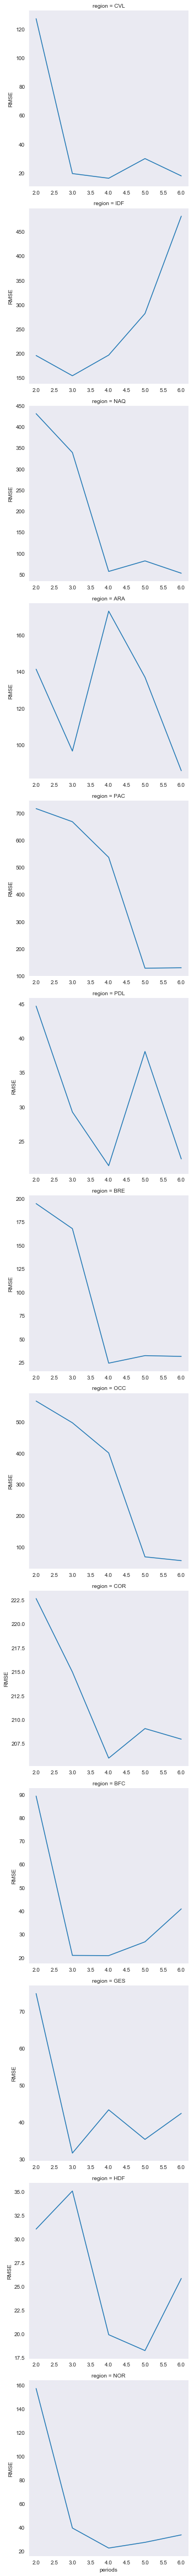

In [7]:
sns.set_style("dark")

sns.relplot(x='periods', y='RMSE',
            row='region',
            kind='line', legend='full',
            data=prophet_results,
            facet_kws={'sharex': False, 'sharey': False});

### MASE curves

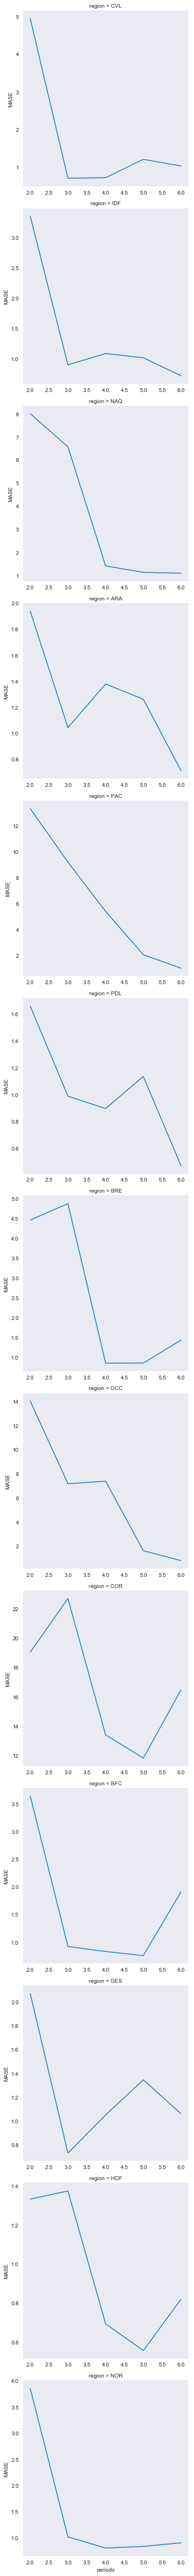

In [8]:
sns.relplot(x='periods', y='MASE',
            row='region',
            kind='line', legend='full',
            data=prophet_results,
            facet_kws={'sharex': False, 'sharey': False});

### Precise error measures for periods = 6

In [12]:
prophet_results[(prophet_results.periods==6)]

,region,periods,MAE,RMSE,Max_error,MASE
4,CVL,6,13.605493,17.778427,0.053119,1.031696
9,IDF,6,410.888202,481.529319,0.159297,0.725180
19,NAQ,6,46.700382,52.557371,0.032421,1.085214
24,ARA,6,63.475497,85.720561,0.076038,0.712447
29,PAC,6,97.397083,129.410661,0.100052,1.024127
34,PDL,6,16.681218,22.428836,0.059679,0.472010
39,BRE,6,25.836604,31.524127,0.060442,1.433111
44,OCC,6,39.167028,55.445991,0.062046,0.788677
49,COR,6,194.295960,207.947217,0.460449,16.473903
54,BFC,6,34.759303,40.855694,0.084417,1.908803


In [17]:
(100 * prophet_results.Max_error[(prophet_results.periods==6)]).round(2).astype(str) + '%'

4      5.31%
9     15.93%
19     3.24%
24      7.6%
29    10.01%
34     5.97%
39     6.04%
44      6.2%
49    46.04%
54     8.44%
59     4.92%
64     5.43%
69      6.1%
Name: Max_error, dtype: object